<a href="https://colab.research.google.com/github/Alxn-z/Diplomado-Inteligencia-Artificial-PLN/blob/Aprendizaje-Supervisado/DeepLearning_MnistADZM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [34]:
 batch_size=128
epocas=5
imagen_size=28

In [35]:
mnist=tf.keras.datasets.mnist

In [36]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [37]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [38]:
(x_train.shape, y_train.shape), (x_test.shape, y_test.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

In [39]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [40]:
x_train=x_train.reshape(x_train.shape[0], imagen_size, imagen_size, 1)
x_test=x_test.reshape(x_test.shape[0], imagen_size, imagen_size, 1)

In [41]:
x_train.shape

(60000, 28, 28, 1)

In [42]:
#convierte vectores one hot, permite una codificacion mejor
y_train=tf.keras.utils.to_categorical(y_train, 10)
y_test=tf.keras.utils.to_categorical(y_test, 10)

In [43]:
#
model = Sequential ([
    # 64% filtros de tamaño 3x3(convolucion)
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    #reduccion de caracteristicas
    MaxPooling2D((2,2)),
    #convolucion con 64 filtros de 3x3
    Conv2D(64, (3,3), activation='relu'),
    #reduccion de caracteristicas de 2x2 porqe el de esas convolucion va a coger pedasos de 2x2
    MaxPooling2D((2,2)),
    #pasarlo a una caapas de vector
    Flatten(),
    #capa totalmente conectada, funcion de activacion relu
    Dense(128, activation='relu'),
    #eliminado de neuronas del 3%, para ayudar a la generalizacion
    Dropout(0.3),
    # salida en probabilidad de cada numero
    Dense(10, activation='softmax')

])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [45]:
historia = model.fit(
    x_train, y_train,
    epochs=3,
    batch_size=batch_size,
    validation_data=(x_test, y_test)
)


Epoch 1/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 45s 92ms/step - accuracy: 0.7749 - loss: 1.9442 - val_accuracy: 0.9761 - val_loss: 0.0786
Epoch 2/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 86s 101ms/step - accuracy: 0.9630 - loss: 0.1286 - val_accuracy: 0.9826 - val_loss: 0.0563
Epoch 3/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 79s 95ms/step - accuracy: 0.9738 - loss: 0.0899 - val_accuracy: 0.9846 - val_loss: 0.0541


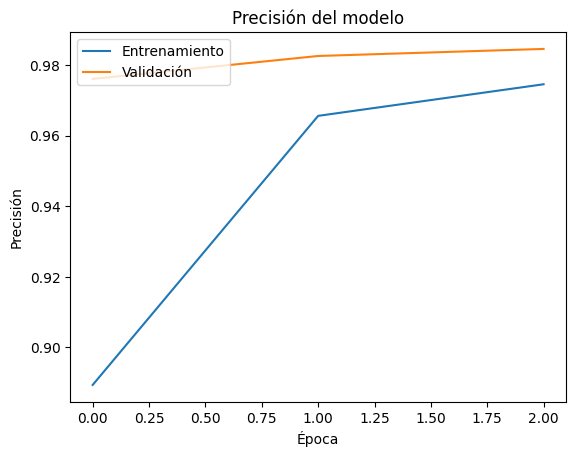

In [47]:
# Graficar precisión
import matplotlib.pyplot as plt

plt.plot(historia.history['accuracy'])
plt.plot(historia.history['val_accuracy'])
plt.title('Precisión del modelo')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()

In [48]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns

# Predicciones en el conjunto de prueba
# argmax toma la clase con mayor probabilidad en cada predicción
y_pred_probs = model.predict(x_test)                    # probabilidades
y_pred_classes = np.argmax(y_pred_probs, axis=1)        # clases predichas
y_true_classes = np.argmax(y_test, axis=1)              # clases verdaderas


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


In [49]:
mx=confusion_matrix(y_true_classes, y_pred_classes)

In [50]:
mx

array([[ 968,    0,    4,    0,    0,    0,    6,    2,    0,    0],
       [   0, 1130,    1,    3,    0,    0,    0,    1,    0,    0],
       [   1,    1, 1022,    3,    0,    0,    0,    4,    1,    0],
       [   0,    0,    1, 1005,    0,    1,    0,    1,    1,    1],
       [   0,    0,    0,    0,  974,    0,    1,    0,    0,    7],
       [   1,    0,    0,   11,    0,  875,    3,    1,    1,    0],
       [   2,    2,    0,    0,    2,    6,  944,    0,    2,    0],
       [   0,    1,   15,    5,    1,    0,    0, 1004,    1,    1],
       [   3,    1,    5,    4,    2,    5,    0,    4,  938,   12],
       [   2,    2,    0,    7,    4,    1,    0,    7,    0,  986]])

<Axes: >

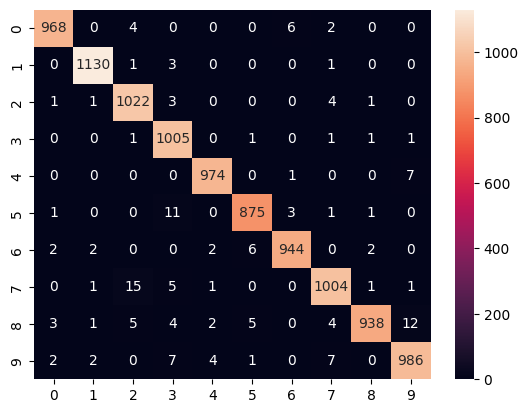

In [51]:
sns.heatmap(mx, annot=True, fmt='d')

In [52]:
print(classification_report(y_true_classes, y_pred_classes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.97      1.00      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.96      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

